# Problem 1
- 2 False: The variance of a Wiener process with scale coefficient sigma = 1 and time t is t2
- 3 False: 
- 4 False: 
- 5 False: 
- 6 False: 
- 8 False: 

# Problem 3
Show that the following identity holds for any given prior and posterior:
    Var [θ] = E[Var [θ |y]] + Var [E[θ |y]] 

Clarification of terms:
1. Var [θ] – Prior variance.
2. E[Var [θ |y]] – Expected posterior variance.
3. Var [E[θ |y]] – Variance of posterior mean

# Problem 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd


In [10]:
np.random.seed(42)
n = 100 #sample size
mu_true = 5 #avg sleep time
sigma = 1.5  #standard deviation
data = np.random.normal(mu_true, sigma, n)
ybar = np.mean(data) 
print(f"Sample Mean (ybar): {ybar:.2f} hours")

# Prior parameters (initial belief about sleep time)
mu0 = 5 
sigma0 = 1.0

# Posterior parameters
sigma_n = np.sqrt(1 / (1 / sigma0**2 + n / sigma**2))
mu_n = (mu0 / sigma0**2 + n * ybar / sigma**2) / (1 / sigma0**2 + n / sigma**2)

print(f"Posterior Mean (µ_n): {mu_n:.2f}")
print(f"Posterior Standard Deviation (σ_n): {sigma_n:.2f}")

Sample Mean (ybar): 4.84 hours
Posterior Mean (µ_n): 4.85
Posterior Standard Deviation (σ_n): 0.15


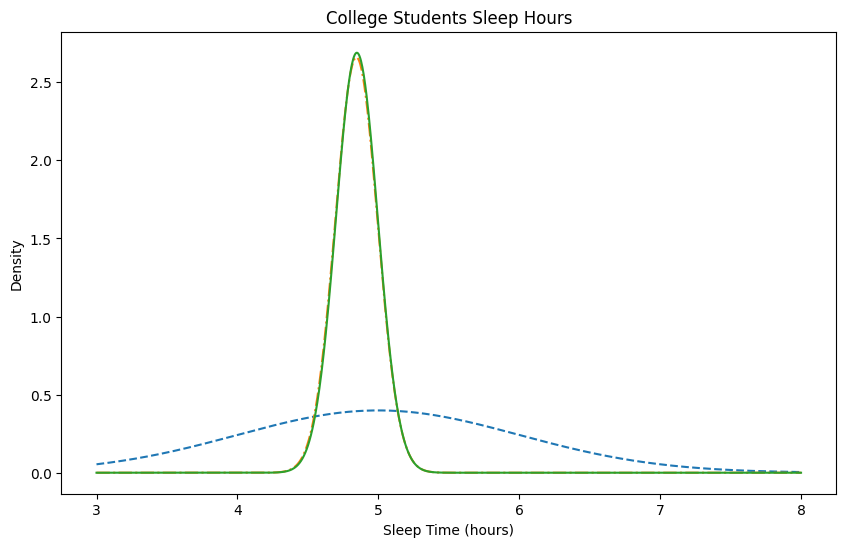

In [ ]:
# Define x-axis range
x = np.linspace(3, 8, 1000)

# Prior distribution
prior = norm.pdf(x, mu0, sigma0)

# Likelihood distribution (centered at sample mean)
likelihood = norm.pdf(x, ybar, sigma / np.sqrt(n))

# Posterior distribution
posterior = norm.pdf(x, mu_n, sigma_n)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior", linestyle="--")
plt.plot(x, likelihood, label="Likelihood", linestyle="-.")
plt.plot(x, posterior, label="Posterior", linestyle="-")
plt.title("College Students Sleep Hours")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Density")
plt.legend()
plt.show()



In [8]:
# Create a DataFrame
df = pd.DataFrame({
    "": ["Precision", "SD", "Mean"],
    "Prior": [1 / sigma0**2, sigma0, mu0],
    "Data (Sample Mean)": [n / sigma**2, sigma / np.sqrt(n), ybar],
    "Posterior": [1 / sigma_n**2, sigma_n, mu_n]
})

# Display the DataFrame
print(df.round(3))

              Prior  Data (Sample Mean)  Posterior
0  Precision    1.0              33.333     34.333
1         SD    1.0               0.173      0.171
2       Mean  100.0              97.450     97.524


# Problem 5


<Axes: ylabel='Count'>

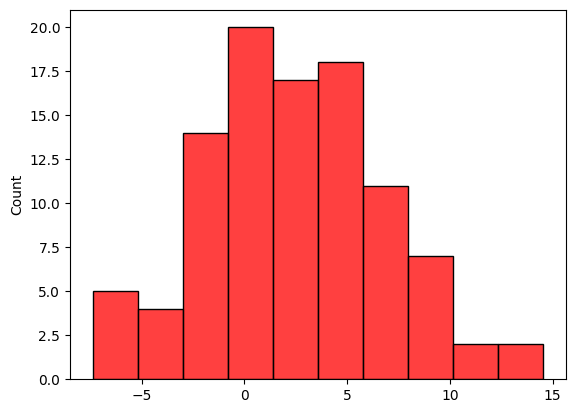

In [ ]:
import numpy as np
import stan
import arviz as az
import nest_asyncio
import seaborn as sns
import matplotlib.pyplot as plt


nest_asyncio.apply()  # Allow nested event loops for Jupyter notebooks
# Simulate data
N = 100
alpha = 2.3
beta = 4.0
sigma = 2.0

x = np.random.normal(size=N)
y = alpha + beta * x + sigma * np.random.normal(size=N)
sns.histplot(y, color="red")

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (1500/6000)
Sampling:  50% (3000/6000)
Sampling:  75% (4500/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  2.701  0.197   2.344    3.082      0.003    0.003    3785.0    2755.0   
beta   3.838  0.176   3.488    4.142      0.003    0.003    3854.0    3215.0   
sigma  1.987  0.143   1.734    2.265      0.002    0.002    3842.0    2617.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


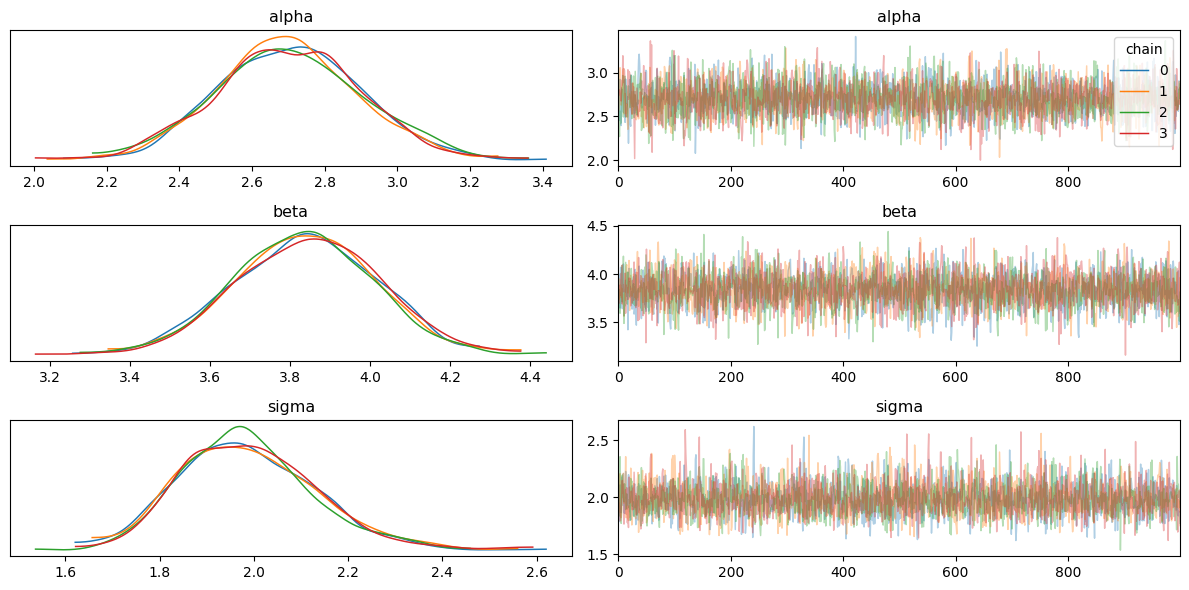

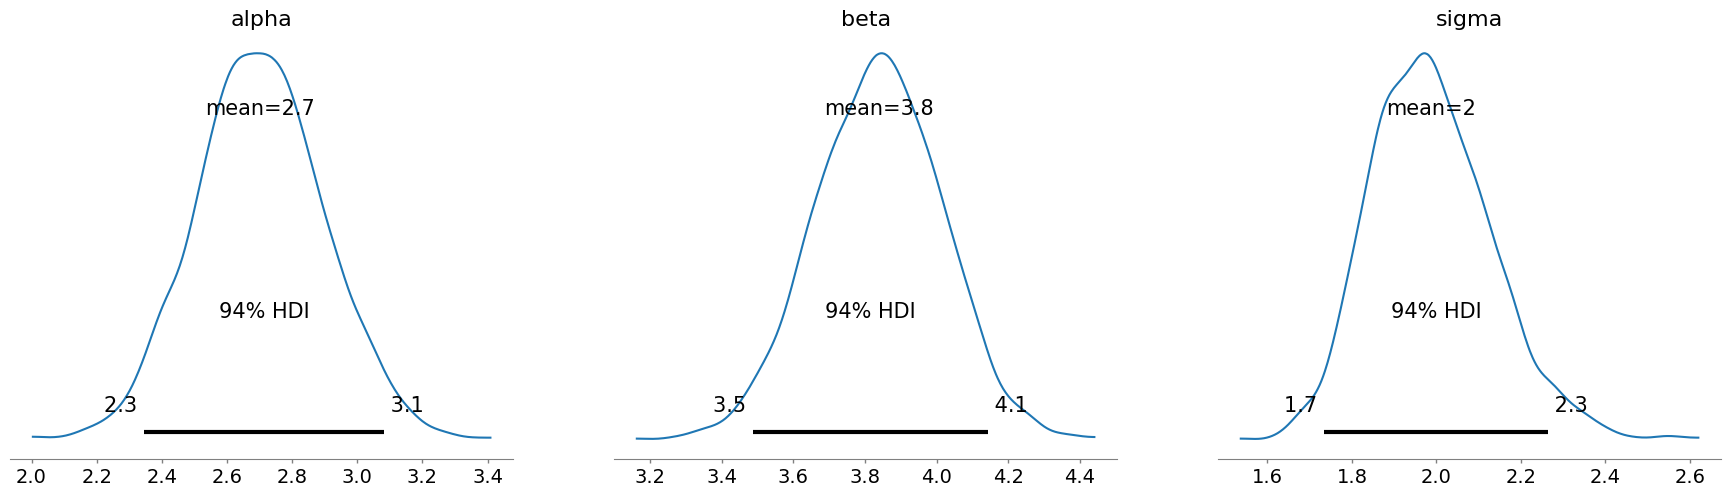

In [ ]:
stan_code = """
data {
    int<lower=1> N;       // Number of observations
    vector[N] x;          // Covariate
    vector[N] y;          // Outcome
}

parameters {
    real alpha;           // Intercept
    real beta;            // Slope
    real<lower=0> sigma2; // Variance (sigma squared)
}

transformed parameters {
    real<lower=0> sigma;  // Standard deviation
    sigma = sqrt(sigma2);
}

model {
    // Priors
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    sigma2 ~ inv_gamma(1, 1);

    // Likelihood
    y ~ normal(alpha + beta * x, sigma);
}
"""
# Prepare data dictionary
data_dict = {
    'N': N,
    'x': x,
    'y': y
}

# Build and fit the model
model = stan.build(stan_code, data=data_dict)
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=500)
summary = az.summary(fit, var_names=['alpha', 'beta', 'sigma'])
print(summary)

# Trace plots for convergence diagnostics
az.plot_trace(fit, var_names=['alpha', 'beta', 'sigma'], compact=False, legend=True)
plt.tight_layout()
plt.show()

# Plot posterior distributions
az.plot_posterior(fit, var_names=['alpha', 'beta', 'sigma'])
plt.show()

In [5]:
# Simulate larger dataset
N_large = 1000
x_large = np.random.normal(size=N_large)
y_large = alpha + beta * x_large + sigma * np.random.normal(size=N_large)

# Prepare data dictionary for larger dataset
data_dict_large = {
    'N': N_large,
    'x': x_large,
    'y': y_large
}

# Build and fit the model with larger dataset
model_large = stan.build(stan_code, data=data_dict_large)
fit_large = model_large.sample(num_chains=4, num_samples=1000, num_warmup=500)

# Summarize results
summary_large = az.summary(fit_large, var_names=['alpha', 'beta', 'sigma'])
print(summary_large)

# Compare uncertainty
print("Uncertainty (N=100):")
print(summary[['mean', 'sd', 'hdi_3%', 'hdi_97%']])
print("\nUncertainty (N=1000):")
print(summary_large[['mean', 'sd', 'hdi_3%', 'hdi_97%']])

Building...



Building: found in cache, done.Sampling:   0%


Sampling:  25% (1500/6000)
Sampling:  50% (3000/6000)
Sampling:  75% (4500/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.000227 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.27 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_tzmle_c1/model_hxisyy5r.stan', line 26, column 4 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.00388 seconds
  1000 transitions using 10 leapfrog steps per transition would take 38.8 seconds.
  Adjust your expect

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  2.220  0.064   2.102    2.344      0.001    0.001    3953.0    3010.0   
beta   3.980  0.065   3.851    4.097      0.001    0.001    3775.0    2697.0   
sigma  1.993  0.044   1.912    2.076      0.001    0.001    3210.0    2842.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  
Uncertainty (N=100):
        mean     sd  hdi_3%  hdi_97%
alpha  2.701  0.197   2.344    3.082
beta   3.838  0.176   3.488    4.142
sigma  1.987  0.143   1.734    2.265

Uncertainty (N=1000):
        mean     sd  hdi_3%  hdi_97%
alpha  2.220  0.064   2.102    2.344
beta   3.980  0.065   3.851    4.097
sigma  1.993  0.044   1.912    2.076
